<a href="https://colab.research.google.com/github/ripet00/BMI-Calculator/blob/main/Predict_height_%26_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns

# lib to import graph
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/weight-height.csv", index_col=0)

In [8]:
df.head()

,Height(Inches),Weight(Pounds)
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801


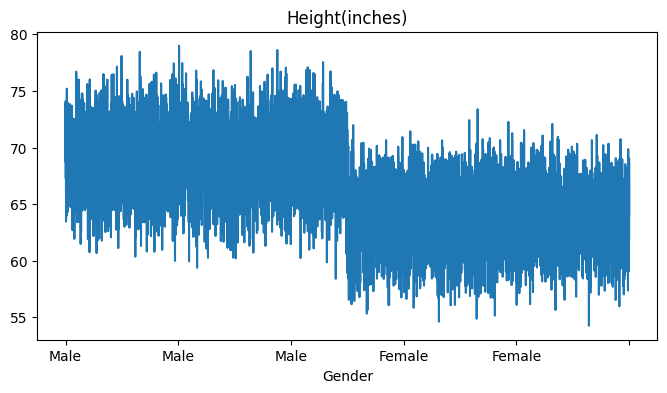

In [9]:
df['Height(Inches)'].plot(kind='line', figsize=(8, 4), title='Height(inches)')
# to create annoted heatmaps
plt.gca().spines[['top','right']].set_visible(True)

In [10]:
df.tail()

,Height(Inches),Weight(Pounds)
Gender,,
Female,66.172652,136.777454
Female,67.067155,170.867906
Female,63.867992,128.475319
Female,69.034243,163.852461
Female,61.944246,113.649103


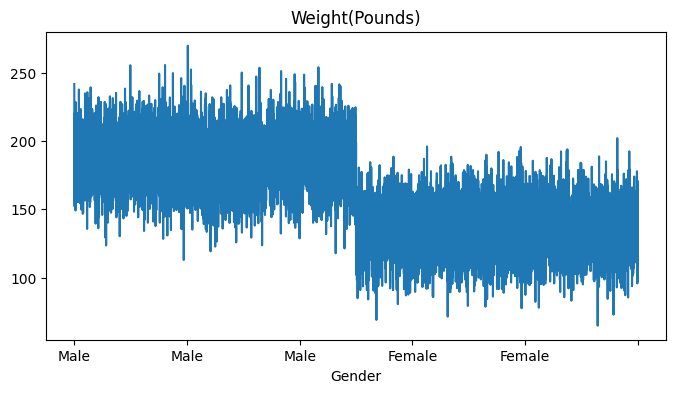

In [11]:
df['Weight(Pounds)'].plot(kind='line', figsize=(8, 4), title='Weight(Pounds)')
# to create annoted heatmaps
plt.gca().spines[['top','right']].set_visible(True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Male to Female
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  9997 non-null   float64
 1   Weight(Pounds)  9997 non-null   float64
dtypes: float64(2)
memory usage: 234.4+ KB


In [13]:
df.shape

(10000, 2)

In [14]:
# to describe the data it's count, mean, min, max
df.describe()

,Height(Inches),Weight(Pounds)
count,9997.000000,9997.000000
mean,66.366724,161.433664
std,3.847752,32.110873
min,54.263133,64.700127
25%,63.504799,135.814924
50%,66.317755,161.193433
75%,69.173577,187.187094
max,78.998742,269.989699


In [15]:
df.rename(columns={
    'Height(Inches)':'Height',
    'Weight(Pounds)':'Weight',
    }, inplace=True)

df.columns

Index(['Height', 'Weight'], dtype='object')

In [16]:
# to convert inches to cm
df["Height"] = df['Height']*(0.0254)
# to convert pounds to kg
df["Weight"] = df['Weight']*(2.205)

In [17]:
# see the result
df.head()

,Height,Weight
Gender,,
Male,1.875714,533.375307
Male,1.747060,357.894592
Male,1.882397,469.093587
Male,1.821967,485.193647
Male,1.774998,455.001310


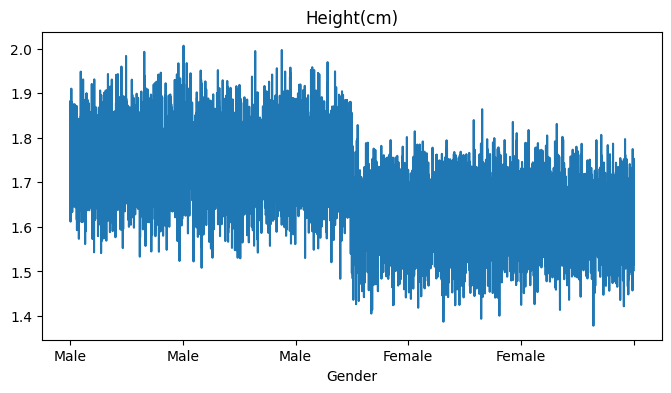

In [18]:
df['Height'].plot(kind='line', figsize=(8, 4), title='Height(cm)')
# to create annotated heatmaps
plt.gca().spines[['top','right']].set_visible(True)

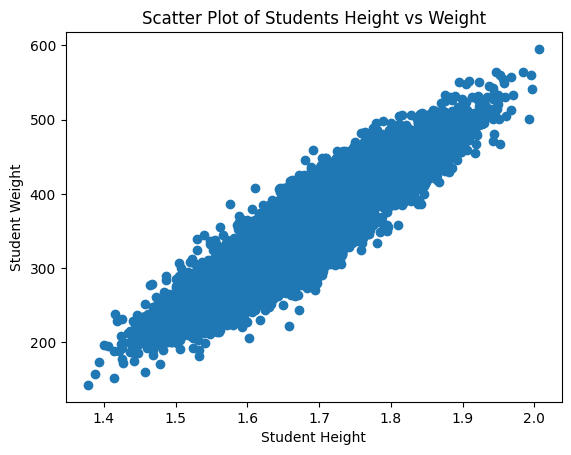

In [19]:
# make a scatter graph (grafik penyebaran)
plt.scatter(x=df.Height, y=df.Weight)
plt.xlabel("Student Height")
plt.ylabel("Student Weight")
plt.title("Scatter Plot of Students Height vs Weight")

plt.show()

In [20]:
print(df['Height'].duplicated().any())
print(df['Weight'].duplicated().any())

True
True


In [21]:
df = df.drop_duplicates(subset=['Height'])
df = df.drop_duplicates(subset=['Weight'])

In [22]:
df = df.reset_index(drop=True)

<Axes: xlabel='Height', ylabel='Weight'>

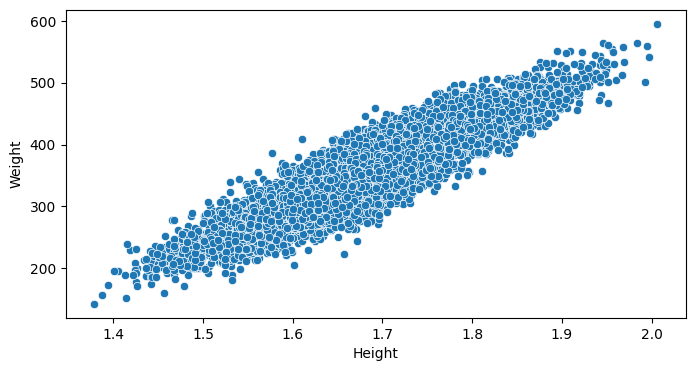

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Height'], y=df['Weight'])

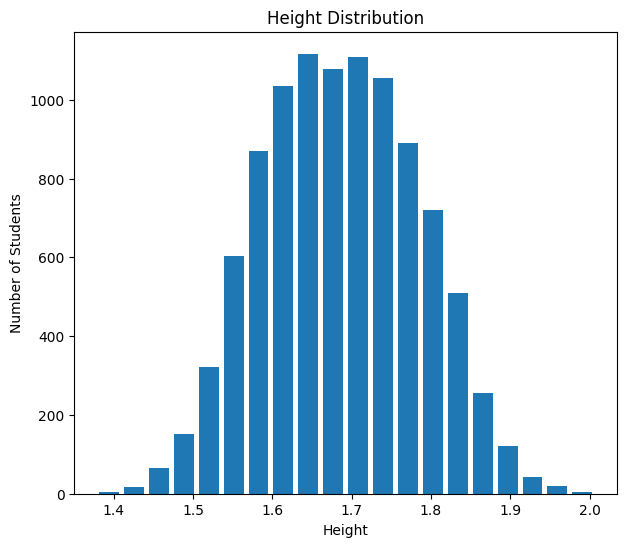

In [24]:
# to make a bar graph to find the number of students with different heights
plt.figure(figsize=(7, 6))
plt.hist(df['Height'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Number of Students')
plt.title('Height Distribution')
plt.show()

End of the session 1

 **Start session 2**
 to create **data cleaning**

 Data Cleaning

Now there was something more unanticipated came up the data for few previous student was missing. How to find number of students whose height or weight data is missing ? ""





In [25]:
df.isnull().sum()

,0
Height,1
Weight,1


In [26]:
df.info()
df.mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  9995 non-null   float64
 1   Weight  9995 non-null   float64
dtypes: float64(2)
memory usage: 156.3 KB


,0
Height,1.685703
Weight,355.945732


In [27]:
# to find the mean of all other data & out the mean of their height & weight to the right position
df.mean()

,0
Height,1.685703
Weight,355.945732


In [28]:
df2 = df.fillna(df.mean())
# to see all datas are filled
df2.isnull().sum()

df2.head()

,Height,Weight
0,1.875714,533.375307
1,1.747060,357.894592
2,1.882397,469.093587
3,1.821967,485.193647
4,1.774998,455.001310


## Split the data
* we have to now train the data, so far that we are going to make two different dataframes

*   The first one which will only comprise of the height in that we will drop the weight.
*   The second one which will only comprise of the weight in that we will drop the height.

In [29]:
x = df2.drop("Weight", axis = "columns")
y = df2.drop("Height", axis = "columns")

# Print the dataframe
print("Shape of X = ", x.shape)
print("Shape of y = ", y.shape)

Shape of X =  (9996, 1)
Shape of y =  (9996, 1)


Whenever we train a machine learning model what we do is that we divide the data in 2 parts. The data which will be used to test and the data and the other which will be used to train. So both height and weight which are X and y respectively they are divided into parts.

In [30]:
from sklearn.model_selection import train_test_split
# sklearn (one of the library machine learning) stands for scikit learn is a library which contains different algorithms



Shape of x_train =  (7996, 1)
Shape of x_train =  (7996, 1)
Shape of x_test =  (2000, 1)
Shape of y_test =  (2000, 1)


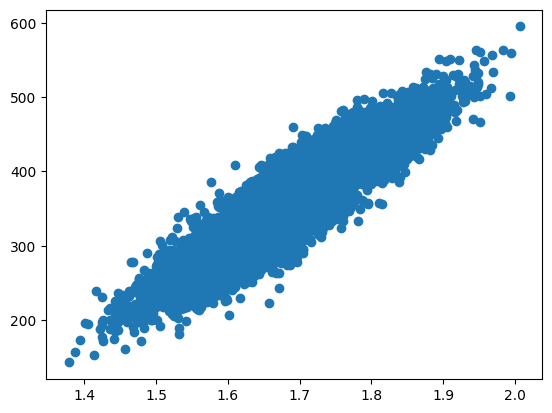

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# train test split is the function which divides it in 4 parts


print("Shape of x_train = ", x_train.shape)
print("Shape of x_train = ", x_train.shape)
print("Shape of x_test = ", x_test.shape)
print("Shape of y_test = ", y_test.shape)

plt.scatter(x_train, y_train)

Select a model and train it

In [32]:
from sklearn.linear_model import LinearRegression
# import the linear regression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [33]:
# coefficient machine
lr.coef_

array([[671.53172079]])

In [34]:
# Intercept
lr.intercept_

array([-775.91952141])

In [35]:
# so user can enter their height to get it's estimated weight
input_height = int(input("Enter the height : "))
m = lr.coef_
c = lr.intercept_
x = input_height
y = m*x + c
print("Estimated Weight = ", y)

Enter the height : 187
Estimated Weight =  [[124800.51226696]]


In [36]:
# lets make another dataset y_pred which will save all the predicted data
y_pred = lr.predict(x_test)
y_pred

array([[319.43784905],
       [322.34727919],
       [311.44548144],
       ...,
       [247.76026612],
       [301.76341047],
       [442.75633342]])

In [37]:
# this cell will compare our data which we have predicted and the one which saved for the data cases
# compare the weight & weight predicted and we can see that they are not very correct
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns=["Height", "Weight", "Weight Predicted"])


,Height,Weight,Weight Predicted
0,1.631133,336.828501,319.437849
1,1.635465,288.693819,322.347279
2,1.619231,294.392948,311.445481
3,1.639695,296.675394,325.187906
4,1.604706,304.339816,301.691413
...,...,...,...
1995,1.672423,356.706661,347.165442
1996,1.718949,426.858310,378.409095
1997,1.524395,259.455633,247.760266
1998,1.604813,299.383112,301.763410


In [38]:
# lets check how good our ML model is by checking our score
lr.score(x_test, y_test) * 100

85.9458320176322

In [39]:
# basic of x_train and saved it in y_train
y_train = lr.predict(x_train)

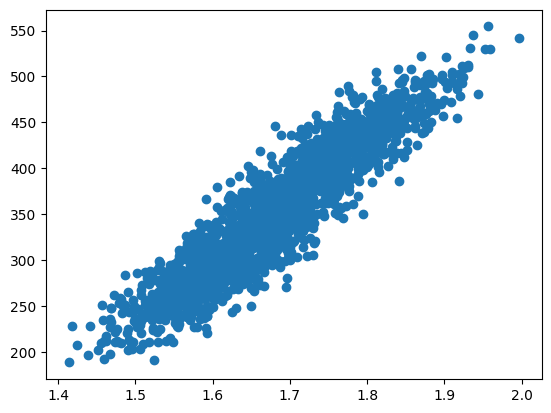

In [40]:
plt.scatter(x_test, y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

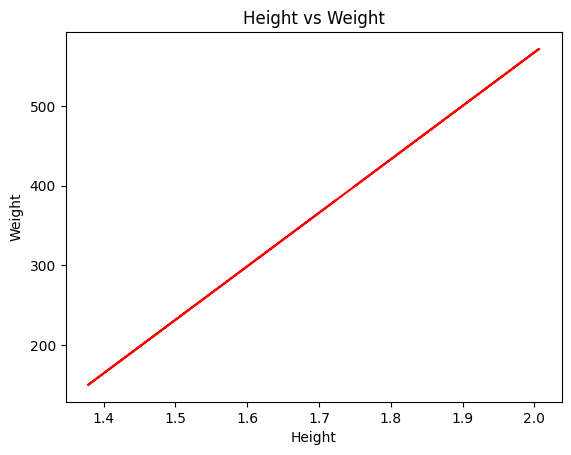

In [41]:
# second line by predicted values
plt.plot(x_train, y_train, color='red')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show

## Save the model to pkl file

In [42]:
import joblib
joblib.dump(lr, "student_weight_prediction.pkl")

['student_weight_prediction.pkl']

In [43]:
# load the model and save it in a variable name as a model
model = joblib.load("student_weight_prediction.pkl")

print(model.coef_)
print(model.intercept_)

In [ ]:
height = int(input("Enter the height : "))
weight = model.predict([[height]])
print("Estimated Weight = ", weight)

model.predict([[height]])[0][0]